In [1]:
import numpy as np

# add the path of my package to system paths so it can be imported
import sys
sys.path.append('/home/yasamanparhizkar/Documents/yorku/01_thesis/code/my_packages')

import my_first_feature_extractor as fe

# Test autorun

In [2]:
# define parameters of feature extraction block
# data_params = {'name': 'mnist', 'version': 'active', 'id': None}
data_params = {'name': 'mnist'}
allocation_params = {'portion': 0.01, 'fracs': [0.5, 0.5], 'seed': 0}
sift_params = {} # all default
kpnum_params = {'min': 2, 'max': 2}
normalize = True
return_imgs = True
save = True
savepath = '../../../data/fe_pt/'
img_sz = (28, 28)

# extract features from mnist images
num_train, num_val, train_data, val_data = \
fe.xsift_from_data(data_params, allocation_params, sift_params, kpnum_params, \
                   normalize, return_imgs, save, savepath, img_sz)

In [3]:
print(num_train)
print(num_val)
print(train_data.keys())
print(val_data.keys())

68
67
dict_keys(['des', 'lbls', 'imgs', 'kp'])
dict_keys(['des', 'lbls', 'imgs', 'kp'])


In [4]:
train_des = train_data['des']
train_lbls = train_data['lbls']
train_imgs = train_data['imgs']
train_kp = train_data['kp']

val_des = val_data['des']
val_lbls = val_data['lbls']
val_imgs = val_data['imgs']
val_kp = val_data['kp']

print("train_des.shape = {}".format(train_des.shape))
print("train_lbls.shape = {}".format(train_lbls.shape))
print("train_imgs.shape = {}".format(train_imgs.shape))
print("len(train_kp) = {}".format(len(train_kp)))
print(" ")
print("val_des.shape = {}".format(val_des.shape))
print("val_lbls.shape = {}".format(val_lbls.shape))
print("val_imgs.shape = {}".format(val_imgs.shape))
print("len(val_kp) = {}".format(len(val_kp)))

train_des.shape = (68, 256)
train_lbls.shape = (68,)
train_imgs.shape = (68, 784)
len(train_kp) = 68
 
val_des.shape = (67, 256)
val_lbls.shape = (67,)
val_imgs.shape = (67, 784)
len(val_kp) = 67


In [5]:
# print(train_des)
# print(train_lbls)
# print(train_imgs)
# print(train_kp)

In [6]:
pers = fe.class_percentages(train_lbls, [0, 1], fe.train_times)
for i in range(2):
    print('{:.2f}% of the training data is class {}, corresponding to {} data points'\
          .format(pers[i], i, pers[i]*num_train//100))

print('Computing these statistics took {:.3f} ms.'.format(fe.train_times['class_percentages']*1000))
print("")

pers = fe.class_percentages(val_lbls, [0, 1], fe.val_times)
for i in range(2):
    print('{:.2f}% of the validation data is class {}, corresponding to {} data points'\
          .format(pers[i], i, pers[i]*num_val//100))

print('Computing these statistics took {:.3f} ms.'.format(fe.val_times['class_percentages']*1000))

51.47% of the training data is class 0, corresponding to 35.0 data points
48.53% of the training data is class 1, corresponding to 33.0 data points
Computing these statistics took 0.194 ms.

41.79% of the validation data is class 0, corresponding to 28.0 data points
58.21% of the validation data is class 1, corresponding to 39.0 data points
Computing these statistics took 0.156 ms.


Some training images:
Drawing these images took 203.592 ms.


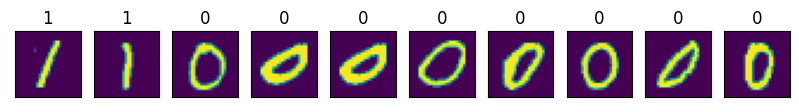

In [7]:
print("Some training images:")
fe.vis_random_imgs(train_imgs, train_lbls, 10, 1, 0, img_sz, fe.train_times)

print('Drawing these images took {:.3f} ms.'.format(fe.train_times['vis_random_imgs']*1000))

Some validation images:
Drawing these images took 143.408 ms.


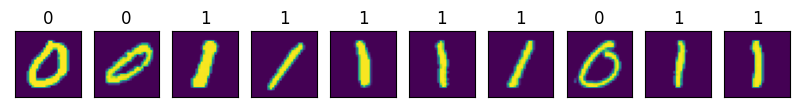

In [8]:
print("Some validation images:")
fe.vis_random_imgs(val_imgs, val_lbls, 10, 1, 0, img_sz, fe.val_times)

print('Drawing these images took {:.3f} ms.'.format(fe.val_times['vis_random_imgs']*1000))

In [9]:
kpnums, kppers = fe.kp_pers(train_kp, fe.train_times)
for i in range(len(kpnums)):
    print('{:.2f}% of training images have {} keypoints.'.format(kppers[i], kpnums[i]))

print('Computing these statistics took {:.3f} ms.'.format(fe.train_times['kp_pers']*1000))
print("")

kpnums, kppers = fe.kp_pers(val_kp, fe.val_times)
for i in range(len(kpnums)):
    print('{:.2f}% of validation images have {} keypoints.'.format(kppers[i], kpnums[i]))

print('Computing these statistics took {:.3f} ms.'.format(fe.val_times['kp_pers']*1000))

100.00% of training images have 2 keypoints.
Computing these statistics took 0.195 ms.

100.00% of validation images have 2 keypoints.
Computing these statistics took 0.175 ms.


Some training images and their keypoints:
Drawing these images took 65.907 ms.


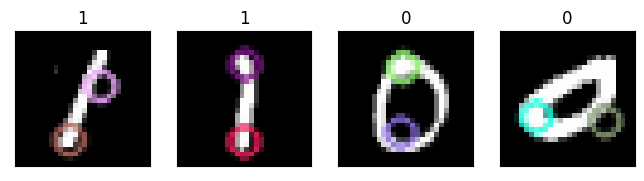

In [10]:
print("Some training images and their keypoints:")
fe.visualize_kps(train_imgs, train_kp, train_lbls, 4, 1, 0, img_sz, False, fe.train_times)

print('Drawing these images took {:.3f} ms.'.format(fe.train_times['visualize_kps']*1000))

Some validation images and their keypoints:
Drawing these images took 77.899 ms.


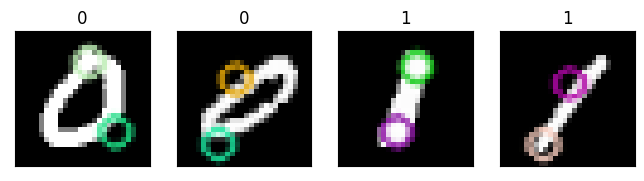

In [11]:
print("Some validation images and their keypoints:")
fe.visualize_kps(val_imgs, val_kp, val_lbls, 4, 1, 0, img_sz, False, fe.val_times)

print('Drawing these images took {:.3f} ms.'.format(fe.val_times['visualize_kps']*1000))

In [12]:
times = fe.get_times()
print('times has {} fields: {}'.format(len(times.keys()), list(times.keys())))

train_times = times['train_times']
val_times = times['val_times']
# print('\ntrain_times has {} fields:\n{}'.format(len(train_times.keys()), list(train_times.keys())))
# print('\nval_times has {} fields:\n{}'.format(len(val_times.keys()), list(val_times.keys())))

times has 2 fields: ['train_times', 'val_times']


In [13]:
print('Below comes a list of running times of all functions for training images.')
for func in train_times:
    if train_times[func] is None:
        print('{:>20}:\t{}'.format(func, train_times[func]))
    elif func == 'split_data':
        print('{:>20}:\t[{:.5f}, {:.5f}] sec'.format(func, train_times[func][0], train_times[func][1]))
    else:
        print('{:>20}:\t{:.5f} sec'.format(func, train_times[func]))

Below comes a list of running times of all functions for training images.
            download:	87.36334 sec
            binarize:	0.06208 sec
          split_data:	[0.00061, 0.00011] sec
       convert_2D_U8:	0.00013 sec
                sift:	0.03245 sec
        detangle_kps:	None
         kpnum_floor:	0.00002 sec
          kpnum_ceil:	0.00376 sec
      normalize_dess:	0.00016 sec
           save_data:	0.01359 sec
           load_data:	None
 make_train_val_data:	87.44366 sec
     xsift_from_imgs:	0.03260 sec
   combine_sift_dess:	0.00398 sec
     xsift_from_data:	87.54269 sec
   class_percentages:	0.00019 sec
       display_image:	0.00224 sec
     vis_random_imgs:	0.20359 sec
             kp_pers:	0.00020 sec
       visualize_kps:	0.06591 sec


In [14]:
# print('Below comes a list of running times of all functions for validation images.')
# for func in val_times:
#     if val_times[func] is None:
#         print('{:>20}:\t{}'.format(func, val_times[func]))
#     elif func == 'split_data':
#         print('{:>20}:\t[{:.5f}, {:.5f}] sec'.format(func, val_times[func][0], val_times[func][1]))
#     else:
#         print('{:>20}:\t{:.5f} sec'.format(func, val_times[func]))

In [15]:
direct_t = train_times['make_train_val_data']
indir_t = train_times['download'] + train_times['binarize'] \
        + train_times['split_data'][0] + train_times['split_data'][1]
assert np.abs(direct_t - indir_t)/direct_t < 0.01

direct_t = train_times['xsift_from_imgs']
indir_t = train_times['convert_2D_U8'] + train_times['sift']
assert np.abs(direct_t - indir_t)/direct_t < 0.01

direct_t = val_times['xsift_from_imgs']
indir_t = val_times['convert_2D_U8'] + val_times['sift']
assert np.abs(direct_t - indir_t)/direct_t < 0.01

direct_t = train_times['combine_sift_dess']
indir_t = train_times['kpnum_floor'] + train_times['kpnum_ceil'] + train_times['normalize_dess']
assert np.abs(direct_t - indir_t)/direct_t < 0.01

direct_t = val_times['combine_sift_dess']
indir_t = val_times['kpnum_floor'] + val_times['kpnum_ceil'] + val_times['normalize_dess']
assert np.abs(direct_t - indir_t)/direct_t < 0.01

direct_t = train_times['xsift_from_data']
indir_t = train_times['make_train_val_data'] \
        + train_times['xsift_from_imgs'] + val_times['xsift_from_imgs'] \
        + train_times['combine_sift_dess'] + val_times['combine_sift_dess'] \
        + train_times['save_data'] + val_times['save_data']
assert np.abs(direct_t - indir_t)/direct_t < 0.01

# print(direct_t)
# print(indir_t)

# Test elementary functions

In [16]:
raw_data_x, raw_data_y, data_dim = fe.download('mnist', times = fe.train_times)

print('Downloading took {:.2f} seconds.'.format(fe.train_times['download']))

In [17]:
data_x, data_y, num_classes = fe.binarize(raw_data_x, raw_data_y, times = fe.train_times)

print('Binarizing took {:.3f} ms.'.format(fe.train_times['binarize']*1000))

Binarizing took 85.168 ms.


In [18]:
portion = 0.01
fracs = [0.8,0.2]

train_x,train_y,test_x,test_y = fe.split_data(data_x,data_y,fracs=[portion,portion], seed=None, time_i = 0)
train_x,train_y,  val_x,val_y = fe.split_data(train_x,train_y,fracs=fracs, seed=None, time_i = 1)

num_train = len(train_y)
num_val = len(val_y)

print('First splitting took {:.3f} ms.'.format(fe.train_times['split_data'][0]*1000))
print('Second splitting took {:.3f} ms.'.format(fe.train_times['split_data'][1]*1000))

First splitting took 0.668 ms.
Second splitting took 0.215 ms.


In [19]:
img_sz = (28,28)

cnv_train_x = fe.convert_2D_U8(train_x, img_sz)

print('Converting took {:.3f} ms.'.format(fe.train_times['convert_2D_U8']*1000))

Converting took 0.289 ms.


In [20]:
sift_params = {'nfeatures': 0, \
               'nOctaveLayers':3, \
               'contrastThreshold':0.04, \
               'edgeThreshold':10, \
               'sigma':1.6}
train_kp, train_des = fe.sift(cnv_train_x, sift_params)

print('SIFTing took {:.3f} ms.'.format(fe.train_times['sift']*1000))

SIFTing took 83.242 ms.


In [21]:
train_kp, train_des, train_ind = fe.kpnum_floor(train_kp, train_des, 2)

train_x = train_x[train_ind]
train_y = train_y[train_ind]
num_train = len(train_ind)

print('kpnum_floor took {:.3f} ms.'.format(fe.train_times['kpnum_floor']*1000))

kpnum_floor took 0.031 ms.


In [22]:
train_kp, train_des = fe.kpnum_ceil(train_kp, train_des, 2)

print('kpnum_ceil took {:.3f} ms.'.format(fe.train_times['kpnum_ceil']*1000))

kpnum_ceil took 8.210 ms.


In [23]:
train_des = fe.normalize_dess(np.array(train_des))

print('Normalizing took {:.3f} ms.'.format(fe.train_times['normalize_dess']*1000))

Normalizing took 0.926 ms.


In [24]:
pers = fe.class_percentages(train_y, [0, 1], times = fe.train_times)
for i in range(2):
    print('{:.2f}% of the training data is class {}, corresponding to {} data points'.\
          format(pers[i], i, pers[i]*num_train//100))
    
print('\nComputing percentages took {:.3f} ms.'.format(fe.train_times['class_percentages']*1000))

51.35% of the training data is class 0, corresponding to 57.0 data points
48.65% of the training data is class 1, corresponding to 54.0 data points

Computing percentages took 0.250 ms.


Visualizing took 410.665 ms.


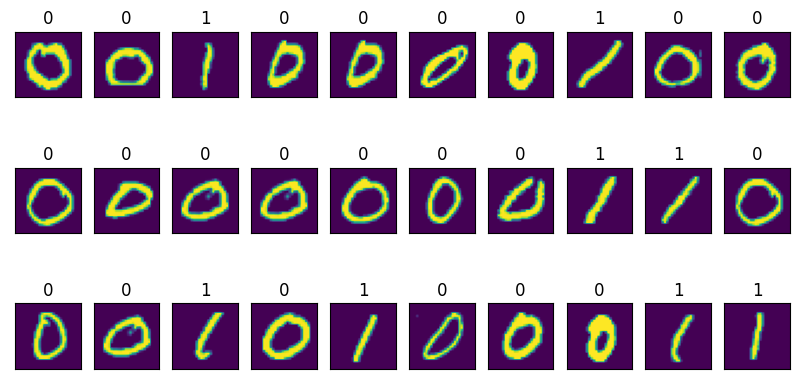

In [25]:
fe.vis_random_imgs(train_x, train_y, 10, 3, 0, img_sz, times=fe.train_times)

print('Visualizing took {:.3f} ms.'.format(fe.train_times['vis_random_imgs']*1000))

In [26]:
kpnums, kppers = fe.kp_pers(train_kp, fe.train_times)
for i in range(len(kpnums)):
    print('{:.2f}% of images have {} keypoints.'.format(kppers[i], kpnums[i]))
    
print('\nComputing these numbers took {:.3f} ms.'.format(fe.train_times['kp_pers']*1000))

100.00% of images have 2 keypoints.

Computing these numbers took 0.074 ms.


Visualizing took 82.865 ms.


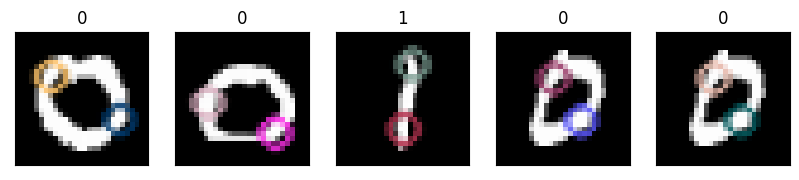

In [27]:
fe.visualize_kps(train_x, train_kp, train_y, 5, 1, 0, img_sz, False, fe.train_times)

print('Visualizing took {:.3f} ms.'.format(fe.train_times['visualize_kps']*1000))